# Red Wine Quality
`redwine-quality.ipynb`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

wine = pd.read_csv('./winequality-red.csv')

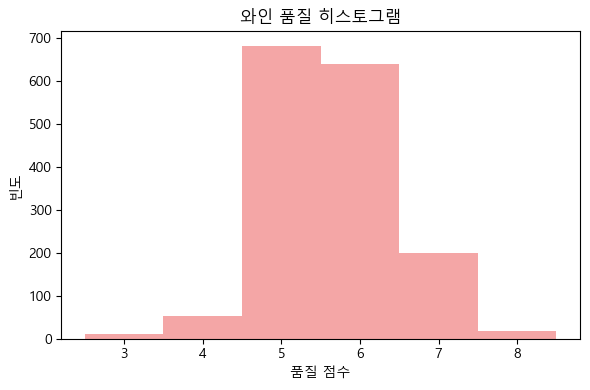

In [10]:
# ÌäπÏÑ± ÏÇ¥Ìé¥Î≥¥Í∏∞ (ÌíàÏßà Î∂ÑÌè¨, ÌûàÏä§ÌÜ†Í∑∏Îû®)
plt.figure(figsize=(6, 4))

plt.hist(wine['quality'], bins=np.arange(2.5, 9.5, 1), alpha=0.7, color='lightcoral')
plt.title('ÏôÄÏù∏ ÌíàÏßà ÌûàÏä§ÌÜ†Í∑∏Îû®')
plt.xlabel('ÌíàÏßà Ï†êÏàò')
plt.ylabel('ÎπàÎèÑ')

plt.tight_layout()
plt.show()

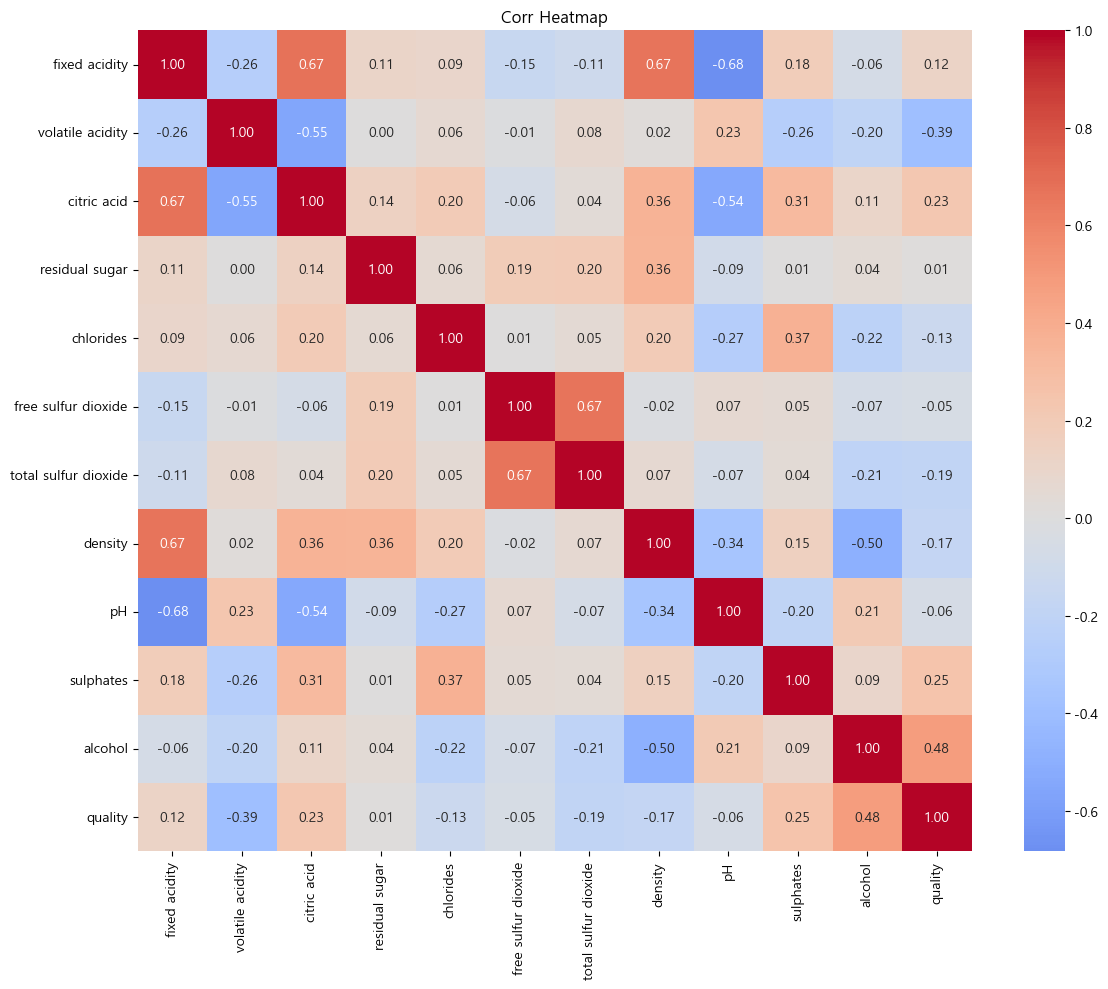

Highest Corr
alcohol: 0.476
volatile acidity: -0.391
sulphates: 0.251
citric acid: 0.226
total sulfur dioxide: -0.185
density: -0.175


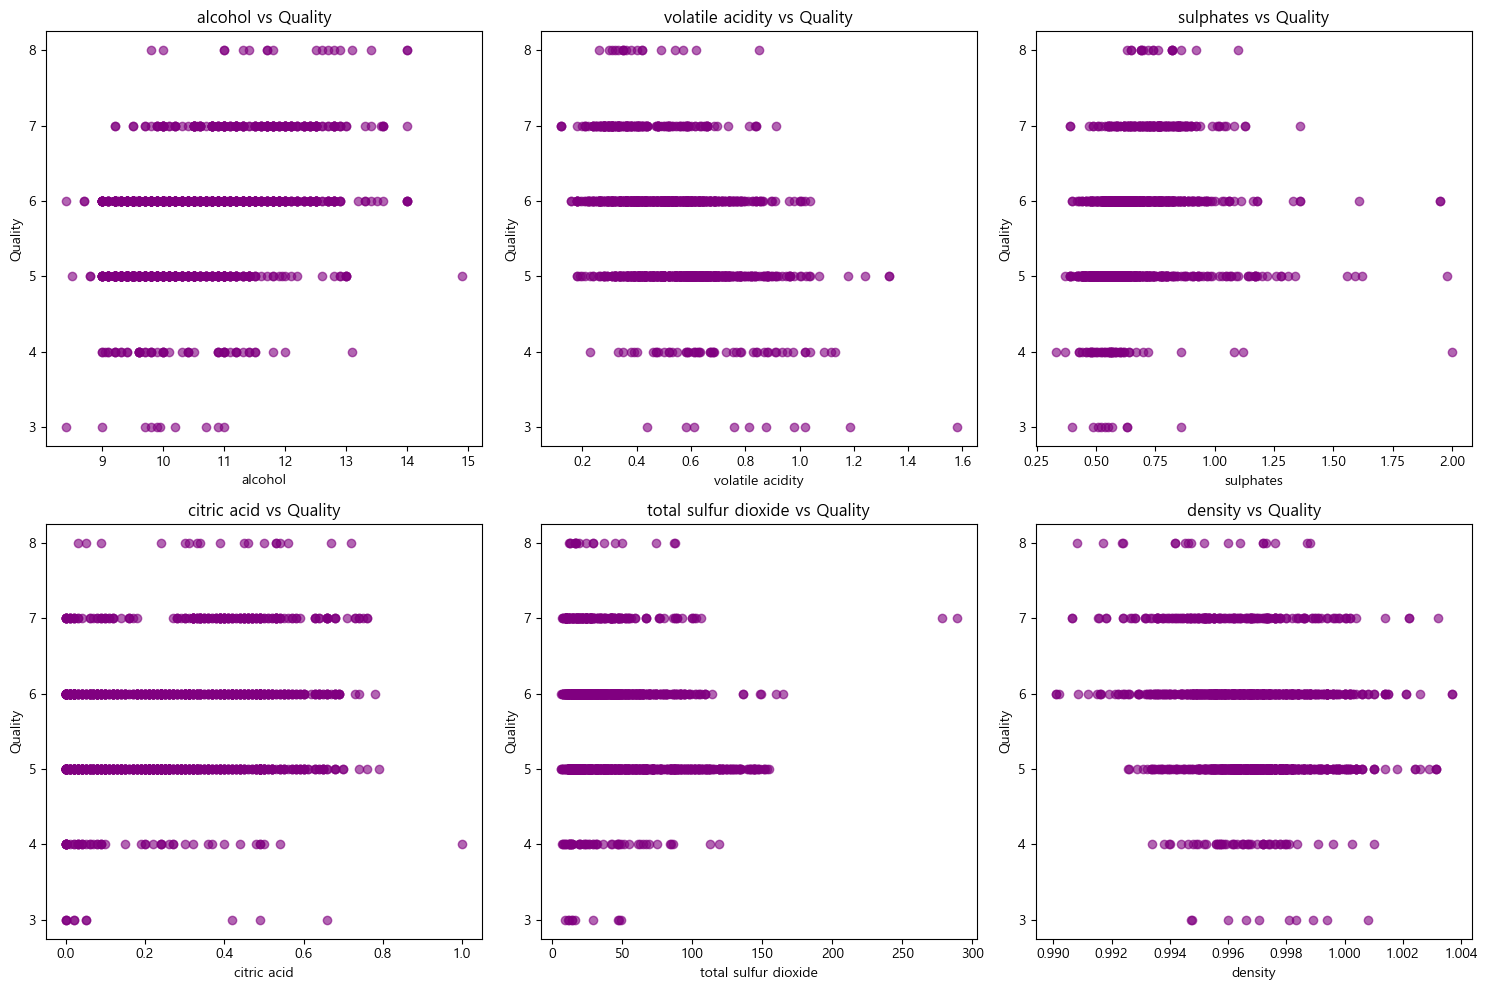

In [11]:
# ÌíàÏßàÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (ÌûàÌä∏Îßµ) / ÌíàÏßàÏóê ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Ï£ºÎäî ÌäπÏÑ±Îì§ ÏãúÍ∞ÅÌôî
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
plt.figure(figsize=(12, 10))
correlation = wine.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Corr Heatmap')
plt.tight_layout()
plt.show()

# ÌíàÏßàÍ≥º Í∞ÄÏû• Í¥ÄÎ†® ÎÜíÏùÄ ÌäπÏÑ±Îì§
quality_corr = correlation['quality'].drop('quality').sort_values(key=abs, ascending=False)
print("Highest Corr")
for feature, corr in quality_corr.head(6).items():
    print(f"{feature}: {corr:.3f}")

# ÌíàÏßàÏóê ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Ï£ºÎäî ÌäπÏÑ±Îì§ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

top_features = quality_corr.head(6).index
for i, feature in enumerate(top_features):
    axes[i].scatter(wine[feature], wine['quality'], alpha=0.6, color='purple')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Quality')
    axes[i].set_title(f'{feature} vs Quality')

plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
# ÌõàÎ†® ÌÖåÏä§Ìä∏ ÏÖã ÎÇòÎàÑÍ∏∞
y = wine['quality']
X = wine.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(X_train)}')
print(f'ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(X_test)}')

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 1199
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 400


In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
# KNN ÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏° 
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

k_scores = []

for k in range(1, 31):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train_scaled, y_train)
    knr_train_score = knr.score(X_train_scaled, y_train)
    knr_test_score = knr.score(X_test_scaled, y_test)
    k_scores.append((k, knr_test_score, knr_train_score))

max_k, max_test_score, max_train_score = max(k_scores, key=lambda x: x[1])
print(f'ÏµúÍ≥†Ï†êÏàò k: {max_k}, Ï†êÏàò: {max_test_score:.4f}')

# best_knr = KNeighborsRegressor(n_neighbors=max_k)

ÏµúÍ≥†Ï†êÏàò k: 14, Ï†êÏàò: 0.3504


In [50]:
from sklearn.linear_model import LinearRegression
# ÏÑ†ÌòïÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏° (ÌõàÎ†®ÏÖã/ÌÖåÏä§Ìä∏ÏÖãÏùò Ï†êÏàòÎ•º ÎÜíÏó¨Î≥¥Ïûê)

lr_basic = LinearRegression()
lr_basic.fit(X_train, y_train)

lr_basic_score = lr_basic.score(X_test, y_test)

print(f'Í∏∞Î≥∏ LR Score(R^2): {lr_basic_score:.4f} (Train: {lr_basic.score(X_train, y_train)})')

# ÏòàÏ∏° Ïã§Ï†ú Í∞í Í≥ÑÏÇ∞(ÏãúÍ∞ÅÌôî)
lr_basic_pred = lr_basic.predict(X_test)

Í∏∞Î≥∏ LR Score(R^2): 0.3723 (Train: 0.354852874520566)


In [62]:
from sklearn.preprocessing import PolynomialFeatures
# Îã§Ìï≠ ÌöåÍ∑Ä (Ïä§ÏºÄÏùºÎßÅ ÌïÑÏöî)
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

poly_results = []
for degree in [2, 3, 4]:
    print(f'\n{degree}Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò')
    # Îã§Ìï≠Ïãù ÌäπÏÑ± ÏÉùÏÑ±
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    print(f'ÏõêÎûò ÌäπÏÑ± Ïàò: {X_train_scaled.shape[1]}')
    print(f'Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: {X_train_poly.shape[1]}')

    # Î™®Îç∏ ÌõàÎ†®
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)

    # ÏÑ±Îä• ÌèâÍ∞Ä
    poly_score = lr_poly.score(X_test_poly, y_test)
    poly_results.append((degree, poly_score))
    print(f'Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: {degree} -> {poly_score:.4f}')

    # Overfitting Ï≤¥ÌÅ¨Î•º ÏúÑÌïú ÏÑ±Îä• ÌôïÏù∏
    train_score = lr_poly.score(X_train_poly, y_train)
    print(f'ÌõàÎ†® -> {train_score:.4f}')
    print(f'Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> {train_score - poly_score:.4f}')


best_degree, best_score = max(poly_results, key=lambda x: x[1])
print(best_degree, best_score)

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Îã§Ïãú ÌõàÎ†®
poly_best = PolynomialFeatures(degree=best_degree)
X_train_poly_best = poly_best.fit_transform(X_train_scaled)
X_test_poly_best = poly_best.transform(X_test_scaled)

lr_poly_best = LinearRegression()
lr_poly_best.fit(X_train_poly_best, y_train)
lr_poly_best_score = lr_poly_best.score(X_test_poly_best, y_test)
lr_poly_best_pred = lr_poly_best.predict(X_test_poly_best)


2Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò
ÏõêÎûò ÌäπÏÑ± Ïàò: 11
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: 77
Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: 2 -> 0.3745
ÌõàÎ†® -> 0.4389
Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> 0.0644

3Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò
ÏõêÎûò ÌäπÏÑ± Ïàò: 11
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: 363
Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: 3 -> -0.3482
ÌõàÎ†® -> 0.6528
Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> 1.0010

4Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò
ÏõêÎûò ÌäπÏÑ± Ïàò: 11
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: 1364
Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: 4 -> -3185.0570
ÌõàÎ†® -> 1.0000
Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> 3186.0570
2 0.37445416528963726


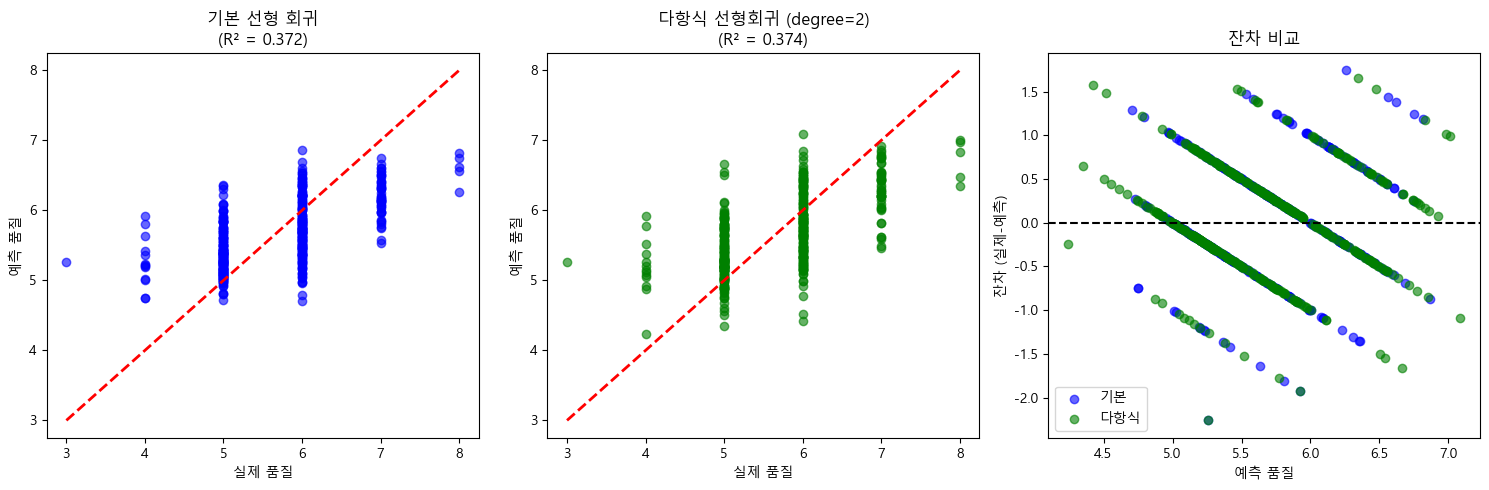

ÏÑ±Îä• Ìñ•ÏÉÅ: 0.0022 (0.6%)


In [65]:
# ÏòàÏ∏° vs Ïã§Ï†úÍ∞í ÎπÑÍµê
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_basic_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ïã§Ï†ú ÌíàÏßà')
plt.ylabel('ÏòàÏ∏° ÌíàÏßà')
plt.title(f'Í∏∞Î≥∏ ÏÑ†Ìòï ÌöåÍ∑Ä\n(R¬≤ = {lr_basic_score:.3f})')

plt.subplot(1, 3, 2)
plt.scatter(y_test, lr_poly_best_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ïã§Ï†ú ÌíàÏßà')
plt.ylabel('ÏòàÏ∏° ÌíàÏßà')
plt.title(f'Îã§Ìï≠Ïãù ÏÑ†ÌòïÌöåÍ∑Ä (degree={best_degree})\n(R¬≤ = {lr_poly_best_score:.3f})')

plt.subplot(1, 3, 3)
# ÏûîÏ∞® ÎπÑÍµê
residuals_basic = y_test - lr_basic_pred
residuals_poly = y_test - lr_poly_best_pred

plt.scatter(lr_basic_pred, residuals_basic, alpha=0.6, color='blue', label='Í∏∞Î≥∏')
plt.scatter(lr_poly_best_pred, residuals_poly, alpha=0.6, color='green', label='Îã§Ìï≠Ïãù')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('ÏòàÏ∏° ÌíàÏßà')
plt.ylabel('ÏûîÏ∞® (Ïã§Ï†ú-ÏòàÏ∏°)')
plt.title('ÏûîÏ∞® ÎπÑÍµê')
plt.legend()

plt.tight_layout()
plt.show()

improvement = lr_poly_best_score - lr_basic_score
print(f"ÏÑ±Îä• Ìñ•ÏÉÅ: {improvement:.4f} ({improvement/lr_basic_score*100:.1f}%)")


In [70]:
from sklearn.linear_model import Ridge, Lasso

# Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥ Ridge/Lasso Ï†ÅÏö© (ÏïûÏÑú ÎßåÎì† ÏµúÏ†Å degree ÏÇ¨Ïö©)
print(f"Îã§Ìï≠Ïãù ÌäπÏÑ± (degree={best_degree}) Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©:")
print(f"ÌäπÏÑ± Ïàò: {X_train_poly_best.shape[1]}Í∞ú")

# Ridge ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥)
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_scores_poly = []
ridge_train_scores = []

print("\nRidge ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):")
for alpha in alphas:
    ridge_poly = Ridge(alpha=alpha)
    ridge_poly.fit(X_train_poly_best, y_train)
    
    # ÌÖåÏä§Ìä∏ ÏÑ±Îä•
    ridge_score = ridge_poly.score(X_test_poly_best, y_test)
    ridge_scores_poly.append(ridge_score)
    
    # ÌõàÎ†® ÏÑ±Îä• (Í≥ºÏ†ÅÌï© Ï≤¥ÌÅ¨Ïö©)
    ridge_train_score = ridge_poly.score(X_train_poly_best, y_train)
    ridge_train_scores.append(ridge_train_score)
    
    print(f"  alpha={alpha:7.3f}: ÌÖåÏä§Ìä∏={ridge_score:.4f}, ÌõàÎ†®={ridge_train_score:.4f}, Ï∞®Ïù¥={ridge_train_score-ridge_score:.4f}")

best_ridge_alpha_poly = alphas[np.argmax(ridge_scores_poly)]
best_ridge_score_poly = max(ridge_scores_poly)

# Lasso ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥)
lasso_scores_poly = []
lasso_train_scores = []

print("\nLasso ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):")
for alpha in alphas:
    lasso_poly = Lasso(alpha=alpha, max_iter=2000)
    lasso_poly.fit(X_train_poly_best, y_train)
    
    # ÌÖåÏä§Ìä∏ ÏÑ±Îä•
    lasso_score = lasso_poly.score(X_test_poly_best, y_test)
    lasso_scores_poly.append(lasso_score)
    
    # ÌõàÎ†® ÏÑ±Îä•
    lasso_train_score = lasso_poly.score(X_train_poly_best, y_train)
    lasso_train_scores.append(lasso_train_score)
    
    print(f"  alpha={alpha:7.3f}: ÌÖåÏä§Ìä∏={lasso_score:.4f}, ÌõàÎ†®={lasso_train_score:.4f}, Ï∞®Ïù¥={lasso_train_score-lasso_score:.4f}")

best_lasso_alpha_poly = alphas[np.argmax(lasso_scores_poly)]
best_lasso_score_poly = max(lasso_scores_poly)

print(f"\nüèÜ ÏµúÏ†Å ÏÑ±Îä•:")
print(f"Ridge (Îã§Ìï≠Ïãù) - alpha: {best_ridge_alpha_poly}, Score: {best_ridge_score_poly:.4f}")
print(f"Lasso (Îã§Ìï≠Ïãù) - alpha: {best_lasso_alpha_poly}, Score: {best_lasso_score_poly:.4f}")

Îã§Ìï≠Ïãù ÌäπÏÑ± (degree=2) Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©:
ÌäπÏÑ± Ïàò: 78Í∞ú

Ridge ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):
  alpha=  0.001: ÌÖåÏä§Ìä∏=0.3745, ÌõàÎ†®=0.4389, Ï∞®Ïù¥=0.0644
  alpha=  0.010: ÌÖåÏä§Ìä∏=0.3745, ÌõàÎ†®=0.4389, Ï∞®Ïù¥=0.0644
  alpha=  0.100: ÌÖåÏä§Ìä∏=0.3745, ÌõàÎ†®=0.4389, Ï∞®Ïù¥=0.0643
  alpha=  1.000: ÌÖåÏä§Ìä∏=0.3753, ÌõàÎ†®=0.4388, Ï∞®Ïù¥=0.0635
  alpha= 10.000: ÌÖåÏä§Ìä∏=0.3799, ÌõàÎ†®=0.4374, Ï∞®Ïù¥=0.0575
  alpha=100.000: ÌÖåÏä§Ìä∏=0.3929, ÌõàÎ†®=0.4258, Ï∞®Ïù¥=0.0329
  alpha=1000.000: ÌÖåÏä§Ìä∏=0.3496, ÌõàÎ†®=0.3498, Ï∞®Ïù¥=0.0002

Lasso ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):
  alpha=  0.001: ÌÖåÏä§Ìä∏=0.3835, ÌõàÎ†®=0.4362, Ï∞®Ïù¥=0.0527
  alpha=  0.010: ÌÖåÏä§Ìä∏=0.3904, ÌõàÎ†®=0.4104, Ï∞®Ïù¥=0.0200
  alpha=  0.100: ÌÖåÏä§Ìä∏=0.3090, ÌõàÎ†®=0.3057, Ï∞®Ïù¥=-0.0033
  alpha=  1.000: ÌÖåÏä§Ìä∏=-0.0020, ÌõàÎ†®=0.0000, Ï∞®Ïù¥=0.0020
  alpha= 10.000: ÌÖåÏä§Ìä∏=-0.0020, ÌõàÎ†®=0.0000, Ï∞®Ïù¥=0.0020
  alpha=100.000: ÌÖåÏä§Ìä∏=-0.0020, ÌõàÎ†®=0.0000, Ï∞®Ïù¥=0.0020
  alpha=1000.000: ÌÖåÏä§Ìä∏=-0.

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

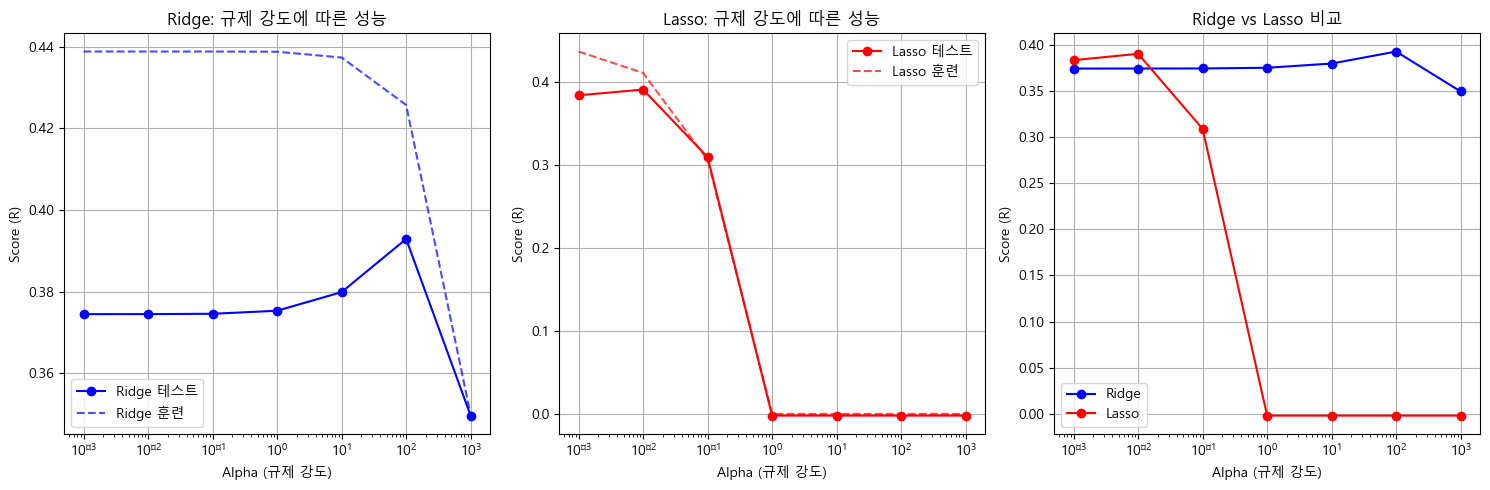

üí° Í¥ÄÏ∞∞:
AlphaÍ∞Ä ÏûëÏùÑ Îïå: ÌõàÎ†® ÏÑ±Îä• > ÌÖåÏä§Ìä∏ ÏÑ±Îä• (Í≥ºÏ†ÅÌï©)
AlphaÍ∞Ä ÌÅ¥ Îïå: ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏ ÏÑ±Îä•Ïù¥ ÎπÑÏä∑ÌïòÏßÄÎßå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÎÇÆÏùå (Í≥ºÏÜåÏ†ÅÌï©)
Ï†ÅÏ†àÌïú Alpha: Í≥ºÏ†ÅÌï©Í≥º Í≥ºÏÜåÏ†ÅÌï©Ïùò Í∑†ÌòïÏ†ê


In [ ]:
# Alpha Í∞íÏóê Îî∞Î•∏ ÏÑ±Îä• ÎπÑÍµê (ÌõàÎ†® vs ÌÖåÏä§Ìä∏)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge ÌÖåÏä§Ìä∏')
plt.plot(alphas, ridge_train_scores, 'b--', alpha=0.7, label='Ridge ÌõàÎ†®')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Ridge: Í∑úÏ†ú Í∞ïÎèÑÏóê Îî∞Î•∏ ÏÑ±Îä•')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso ÌÖåÏä§Ìä∏')
plt.plot(alphas, lasso_train_scores, 'r--', alpha=0.7, label='Lasso ÌõàÎ†®')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Lasso: Í∑úÏ†ú Í∞ïÎèÑÏóê Îî∞Î•∏ ÏÑ±Îä•')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge')
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Ridge vs Lasso ÎπÑÍµê')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
